### knn에서 가장 중요한 것: 하이퍼파라미터 k값을 찾는 것

In [33]:
# set seed
import numpy as np
np.random.seed(5)

In [34]:
import pandas as pd

In [35]:
train = pd.read_csv('data/basketball/train.csv')
test = pd.read_csv('data/basketball/test.csv')

In [36]:
print(train.shape)
print(train.count())
print(train.isnull().sum())
print(test.shape)
print(test.count())
print(test.isnull().sum())

(80, 5)
Player    80
Pos       80
3P        80
TRB       80
BLK       80
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64
(20, 5)
Player    20
Pos       20
3P        20
TRB       20
BLK       20
dtype: int64
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


### K-Fold 교차검증
- 4-fold 예시
- 1~5까지를 테스트로, 6~10까지를 테스트로, 11~15까지를 테스트로, 16~20까지를 테스트로 바꿔가며 교차검증

### 최적의 K 찾기(교차검증 - Cross Validation)

In [37]:
#knn import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # 교차검증 해주는 애

In [38]:
x_train = train[['3P', 'BLK']]
y_train = train['Pos']

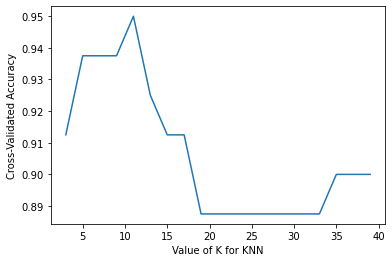

In [39]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습데이터의 절반까지 설정
k_range = range(3, int(train.shape[0]/2), 2) # 3부터 학습데이터의 절반까지 2씩 증가
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn, # 모델명
        x_train, # 훈련 데이터
        y_train, # 훈련 데이터의 레이블
        cv=10, # 10-fold cross validation (10번 교차검증 수행)
        scoring='accuracy' # 정확도를 평가하는 것이므로 'accuracy'를 사용
        ) 
    k_scores.append(scores.mean()) # 각 k에 대한 10번 교차검증 한 평균 정확도를 저장

# 확인
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [40]:
print(k_scores)

[0.9125, 0.9375, 0.9375, 0.9375, 0.95, 0.925, 0.9125, 0.9125, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875, 0.8875, 0.9, 0.9, 0.9]


In [41]:
# 가장 예측률이 높은 k를 선정
best_k = k_range[k_scores.index(max(k_scores))]
print('Best K:', best_k)

Best K: 11


In [42]:
# k값을 설정하고 모델을 생성
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=11)

In [44]:
x_test = test[['3P', 'BLK']]
y_test = test['Pos']

knn.score(x_test, y_test)

pred = knn.predict(x_test)
print(pred)

['C' 'C' 'SG' 'SG' 'C' 'C' 'SG' 'C' 'C' 'C' 'C' 'C' 'SG' 'SG' 'SG' 'SG'
 'SG' 'SG' 'SG' 'SG']


In [46]:
# 실제 데이터와 예측 데이터를 비교
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': pred
})
print(comparison)

   Actual Predicted
0       C         C
1       C         C
2      SG        SG
3      SG        SG
4       C         C
5       C         C
6      SG        SG
7       C         C
8       C         C
9       C         C
10      C         C
11      C         C
12     SG        SG
13     SG        SG
14     SG        SG
15     SG        SG
16     SG        SG
17     SG        SG
18     SG        SG
19     SG        SG


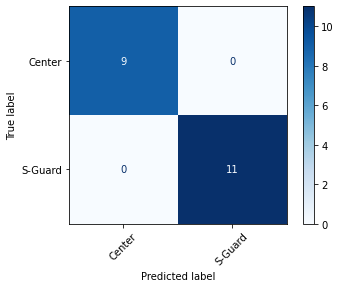

In [52]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, pred)
target_names = ['Center', 'S-Guard']
display = ConfusionMatrixDisplay(confusion_matrix, display_labels=target_names)
display.plot(include_values=True, cmap='Blues', xticks_rotation=45)
plt.show()

---
### 3개의 feature(특징)으로 예측하기

In [53]:
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train['Pos']

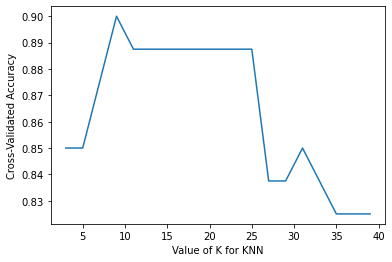

In [54]:
# 최적의 k 값 찾기
k_range = range(3, int(train.shape[0]/2), 2)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,
        x_train,
        y_train,
        cv=10,
        scoring='accuracy'
        )
    k_scores.append(scores.mean())

# 확인
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [55]:
# 가장 예측률이 높은 k를 선정
best_k = k_range[k_scores.index(max(k_scores))]
print('Best K:', best_k)

Best K: 9


In [56]:
# k값을 설정하고 모델을 생성
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

# 테스트 데이터 설정
x_test = test[['3P', 'BLK', 'TRB']]
y_test = test['Pos']

# 예측을 수행
pred = knn.predict(x_test)
print(pred)

['C' 'C' 'SG' 'SG' 'C' 'C' 'SG' 'C' 'C' 'C' 'C' 'C' 'SG' 'SG' 'SG' 'SG'
 'SG' 'SG' 'SG' 'SG']


In [58]:
# 실제 데이터와 예측 데이터를 비교
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': pred
})
print(comparison)

   Actual Predicted
0       C         C
1       C         C
2      SG        SG
3      SG        SG
4       C         C
5       C         C
6      SG        SG
7       C         C
8       C         C
9       C         C
10      C         C
11      C         C
12     SG        SG
13     SG        SG
14     SG        SG
15     SG        SG
16     SG        SG
17     SG        SG
18     SG        SG
19     SG        SG


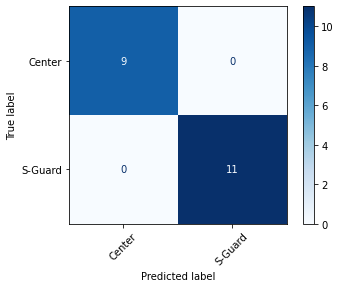

In [59]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, pred)
target_names = ['Center', 'S-Guard']
display = ConfusionMatrixDisplay(confusion_matrix, display_labels=target_names)
display.plot(include_values=True, cmap='Blues', xticks_rotation=45)
plt.show()


In [65]:
# 실제 데이터 예측해보기
knn.predict([[3.4, 0.5, 3.7]])

array(['SG'], dtype=object)